In [2]:
import cv2
import numpy as np
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from imutils import perspective
from imutils import contours
from scipy.spatial import distance as dist

from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.measure import label
from skimage.color import label2rgb
from skimage import measure

In [ ]:
# !rm -rf /content/data

In [1]:
!mkdir data/

###Test

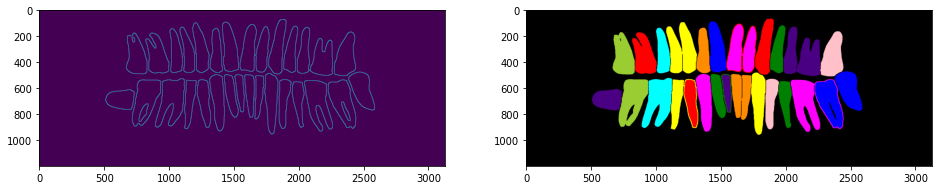

In [40]:
img='/content/98.png'

# Load in image, convert to gray scale, and Otsu's threshold
kernel =( np.ones((3,3), dtype=np.float32))
image = cv2.imread(img)
image=cv2.resize(image,(3130,1200))
image=cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

erosion = cv2.erode(thresh,kernel,iterations =5)
#gradient, aka the contours
gradient = cv2.morphologyEx(erosion, cv2.MORPH_GRADIENT, kernel)

# distance_map = ndi.distance_transform_edt(erosion)
# distance_map = ndi.maximum_filter(distance_map, size=15, mode='constant')
# local_max = peak_local_max(distance_map, indices=False, min_distance=40, labels=thresh)
# # markers = ndi.label(local_max)[0]
# # print(markers)
# # seg_watershed = watershed(-distance_map, markers, mask=thresh)

# distance = ndi.distance_transform_edt(thresh)
# # optima_window_size = 50
# coords = peak_local_max(distance,\
#                         footprint=np.ones((167, 133)),\
#                         labels=thresh)
# mask = np.zeros(distance.shape, dtype=bool)
# mask[tuple(coords.T)] = True
# markers, _ = ndi.label(mask)
# seg_watershed = watershed(-distance, markers, mask=thresh)

ret,markers=cv2.connectedComponents(erosion)
new=watershed(erosion,markers,mask=thresh)
RGB = label2rgb(new, bg_label=0)

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(2, 2, 1) 
plt.imshow(gradient)
ax = fig.add_subplot(2, 2, 2) 
plt.imshow(RGB)
plt.show()

###Post-process images###

In [41]:
#connected components(CC)
def ConnectedComp(image):
  # Load in image, convert to gray scale, and Otsu's threshold
  kernel =(np.ones((3,3), dtype=np.float32))
  image = cv2.imread(img)
  image=cv2.resize(image,(3130,1200))
  image=cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

  erosion = cv2.erode(thresh,kernel,iterations =5)
  #gradient, aka the contours
  gradient = cv2.morphologyEx(erosion, cv2.MORPH_GRADIENT, kernel)

  ret,markers=cv2.connectedComponents(erosion)
  new=watershed(erosion,markers,mask=thresh)
  RGB = label2rgb(new, bg_label=0)
  return erosion,gradient,RGB

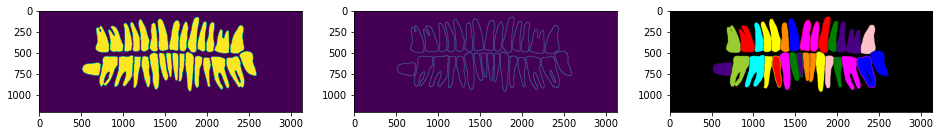

In [42]:
#upload a random image to test
img='/content/98.png'
erosion,gradient,RGB=ConnectedComp(img)

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1, 3, 1) 
plt.imshow(erosion)
ax = fig.add_subplot(1,3, 2) 
plt.imshow(gradient)
ax = fig.add_subplot(1,3, 3) 
plt.imshow(RGB)
plt.show()